In [5]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [7]:
from pandas_datareader import data as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
stockstartdate='2021-01-01'

In [9]:
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-12-20'

In [10]:
stock = yf.download("NFLX", start=stockstartdate, end=today, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [11]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
2021-01-06,511.970001,513.099976,499.500000,500.489990,500.489990,5346200
2021-01-07,508.279999,516.440002,506.420013,508.890015,508.890015,3686400
2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900
...,...,...,...,...,...,...
2021-12-13,612.000000,612.640015,599.520020,604.559998,604.559998,2517900
2021-12-14,598.710022,602.289978,588.130005,597.989990,597.989990,2984500
2021-12-15,598.179993,605.690002,584.510010,605.039978,605.039978,2866200


In [12]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
2021-01-06,511.970001,513.099976,499.500000,500.489990,500.489990,5346200
2021-01-07,508.279999,516.440002,506.420013,508.890015,508.890015,3686400
2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900


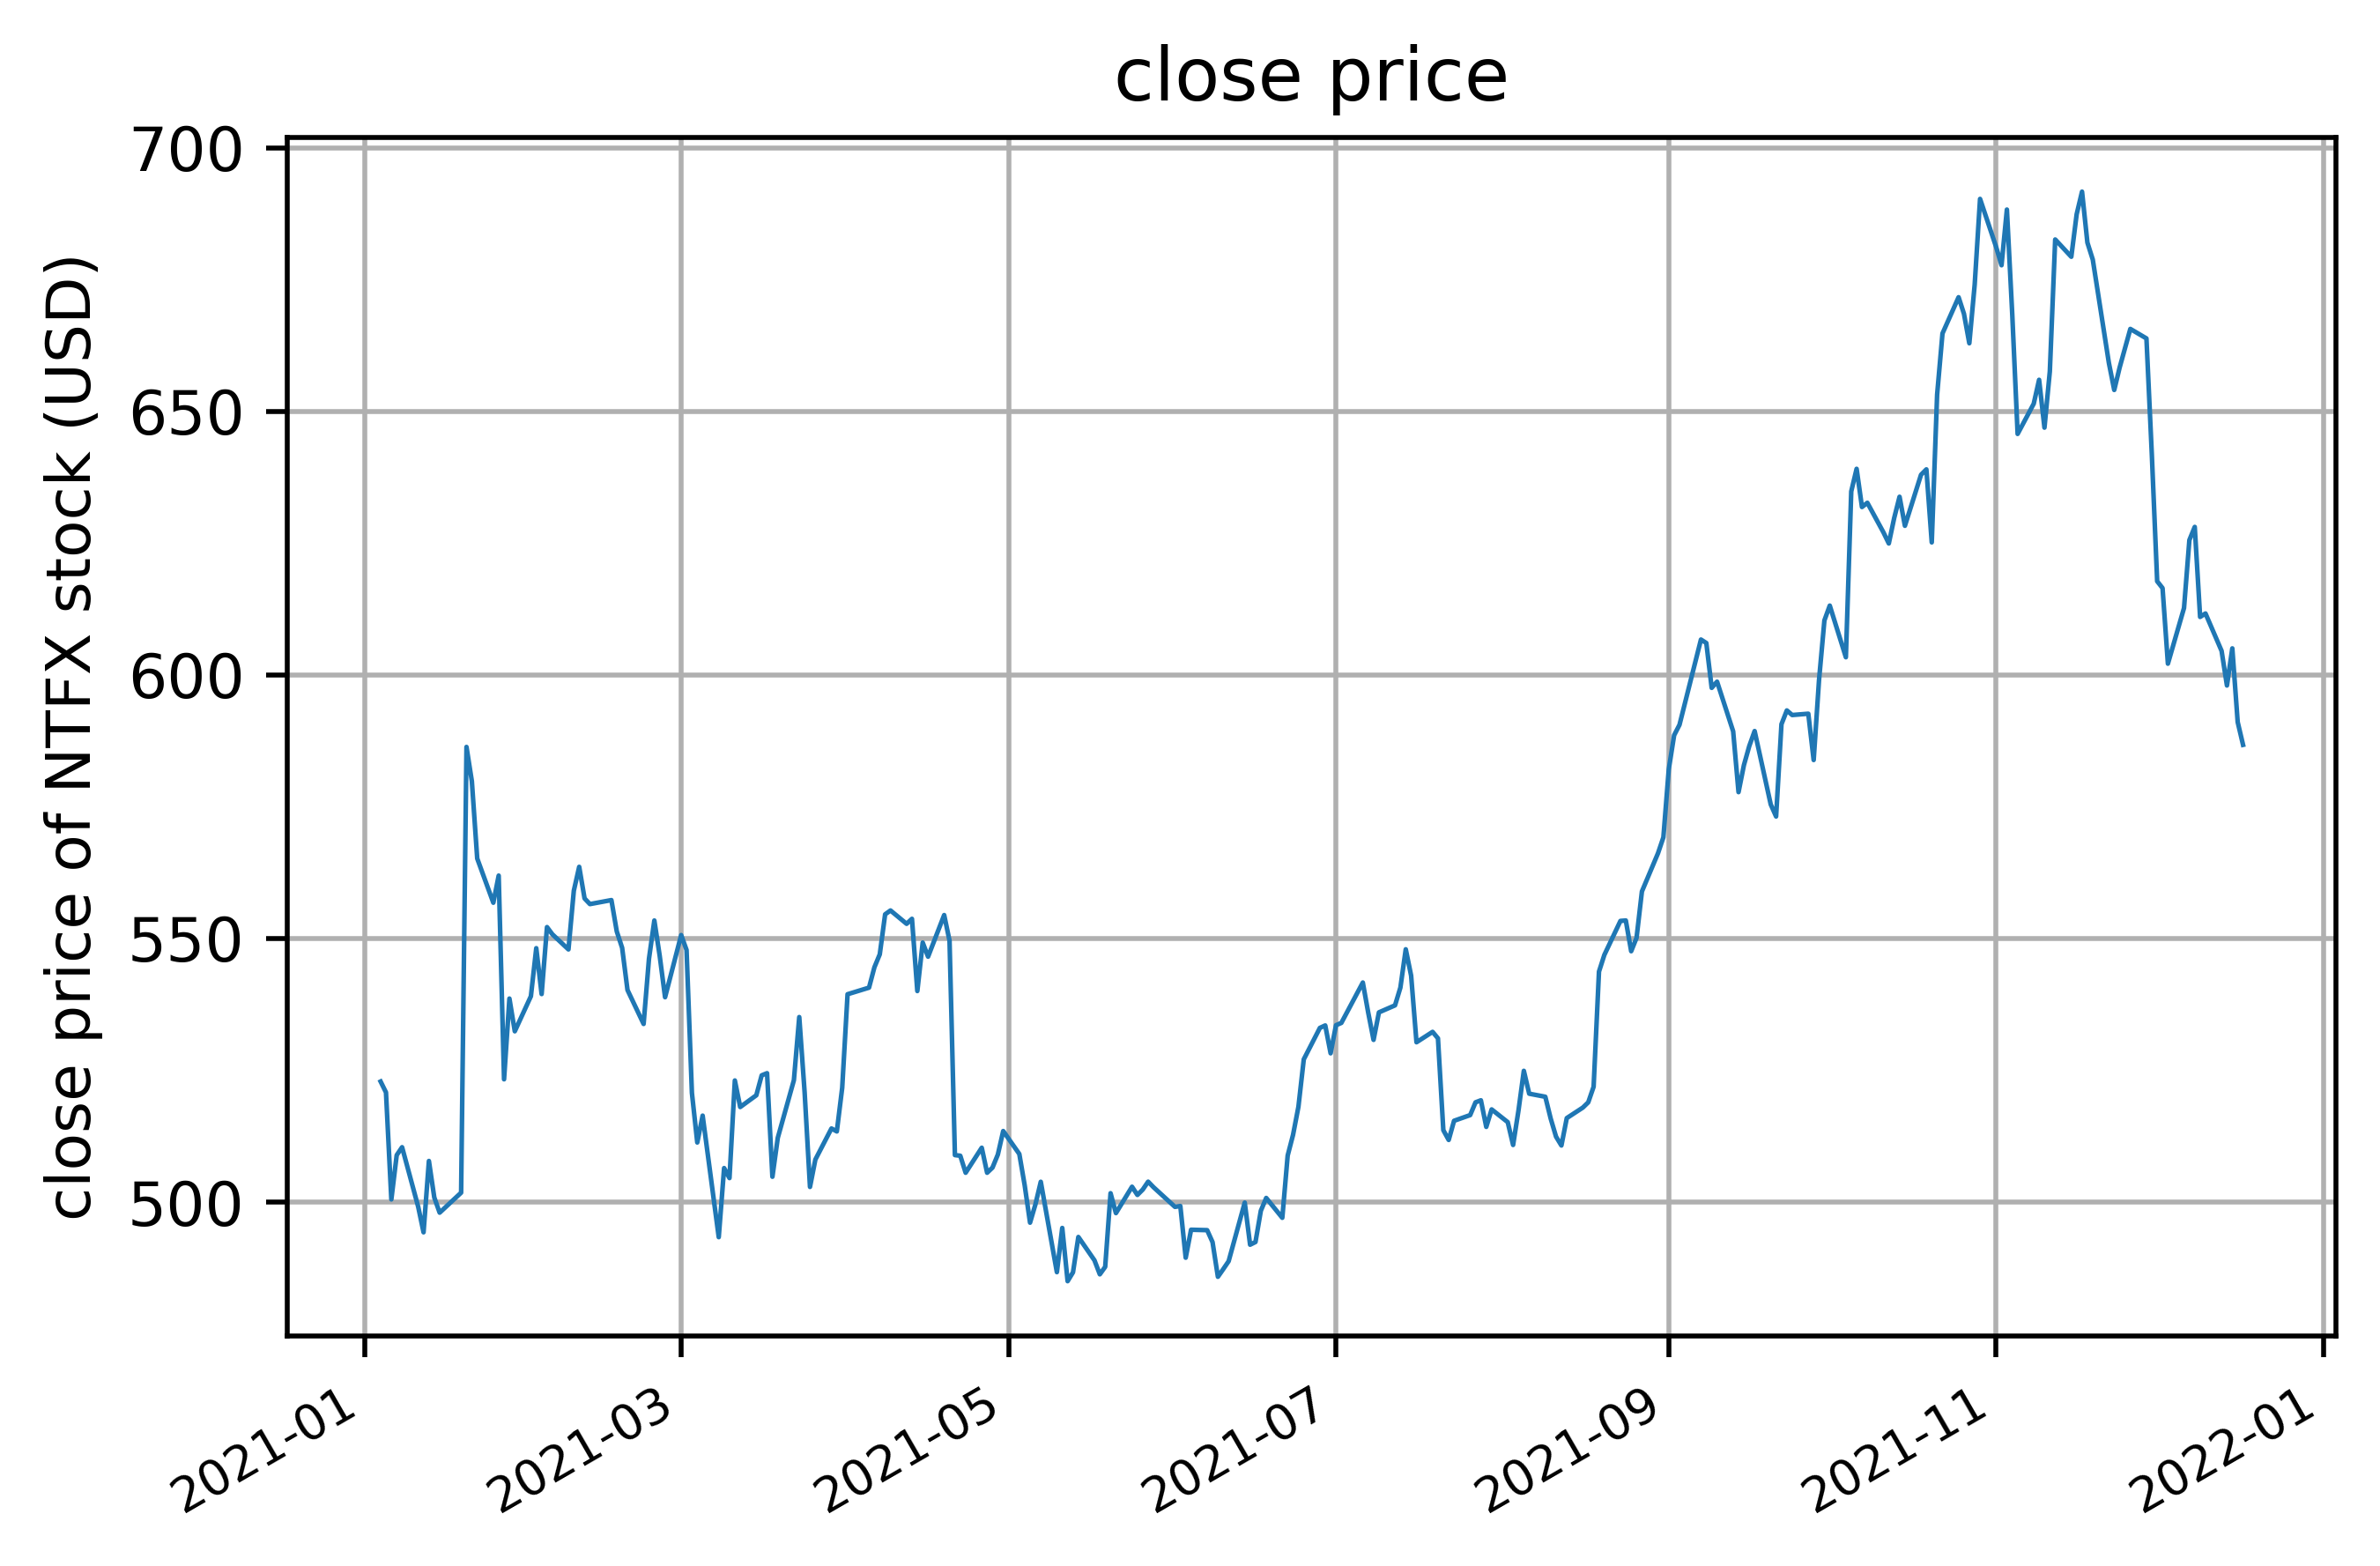

In [13]:
fig, ax = plt.subplots(dpi=500)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()
ax.plot(stock['Close'], lw=0.75)
ax.set_ylabel('close price of NTFX stock (USD)')
ax.set_title('close price')
ax.grid() 
plt.show()

In [14]:
stock=stock[['Close']]
stock.head()

,Close
Date,
2021-01-04,522.859985
2021-01-05,520.799988
2021-01-06,500.489990
2021-01-07,508.890015
2021-01-08,510.399994


In [15]:
future_days=30
stock['Predictions']=stock[['Close']].shift(-future_days)
stock

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,Predictions
Date,,
2021-01-04,522.859985,551.340027
2021-01-05,520.799988,548.219971
2021-01-06,500.489990,540.219971
2021-01-07,508.890015,533.780029
2021-01-08,510.399994,546.150024
...,...,...
2021-12-13,604.559998,NaN
2021-12-14,597.989990,NaN
2021-12-15,605.039978,NaN


In [16]:
x=np.array(stock.drop(['Predictions'],1))[:-future_days]
print(x)

[[522.85998535]
 [520.79998779]
 [500.48999023]
 [508.89001465]
 [510.3999939 ]
 [499.1000061 ]
 [494.25      ]
 [507.79000854]
 [500.85998535]
 [497.98001099]
 [501.76998901]
 [586.34002686]
 [579.84002686]
 [565.16998291]
 [556.7800293 ]
 [561.92999268]
 [523.2800293 ]
 [538.59997559]
 [532.39001465]
 [539.03997803]
 [548.15997314]
 [539.45001221]
 [552.15997314]
 [550.78997803]
 [547.91998291]
 [559.07000732]
 [563.59002686]
 [557.59002686]
 [556.52001953]
 [557.2800293 ]
 [551.34002686]
 [548.2199707 ]
 [540.2199707 ]
 [533.7800293 ]
 [546.15002441]
 [553.40997314]
 [546.70001221]
 [538.84997559]
 [550.64001465]
 [547.82000732]
 [520.70001221]
 [511.29000854]
 [516.39001465]
 [493.32998657]
 [506.44000244]
 [504.54000854]
 [523.05999756]
 [518.02001953]
 [520.25      ]
 [524.0300293 ]
 [524.44000244]
 [504.79000854]
 [512.17999268]
 [523.10998535]
 [535.09002686]
 [520.80999756]
 [502.85998535]
 [508.04998779]
 [513.95001221]
 [513.39001465]
 [521.65997314]
 [539.41998291]
 [540.66

In [17]:
y=np.array(stock['Predictions'])[:-future_days]
print(y)

[551.34002686 548.2199707  540.2199707  533.7800293  546.15002441
 553.40997314 546.70001221 538.84997559 550.64001465 547.82000732
 520.70001221 511.29000854 516.39001465 493.32998657 506.44000244
 504.54000854 523.05999756 518.02001953 520.25       524.0300293
 524.44000244 504.79000854 512.17999268 523.10998535 535.09002686
 520.80999756 502.85998535 508.04998779 513.95001221 513.39001465
 521.65997314 539.41998291 540.66998291 544.5300293  546.98999023
 554.58001709 555.30999756 552.7800293  553.72998047 540.02001953
 549.2199707  546.53997803 554.44000244 549.57000732 508.8999939
 508.77999878 505.54998779 510.29998779 505.54998779 506.51998901
 509.         513.4699707  509.10998535 503.17999268 496.07998657
 499.54998779 503.83999634 486.69000244 495.07998657 484.98001099
 486.66000366 493.36999512 488.94000244 486.27999878 487.70001221
 501.67001343 497.89001465 502.8999939  501.33999634 502.35998535
 503.85998535 502.80999756 499.07998657 499.23999023 489.42999268
 494.7399902

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [19]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [20]:
x_future=stock.drop(['Predictions'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[592.39001465],
       [592.64001465],
       [583.84997559],
       [599.05999756],
       [610.34002686],
       [613.15002441],
       [603.34997559],
       [634.80999756],
       [639.09997559],
       [631.84997559],
       [632.65997314],
       [627.03997803],
       [624.94000244],
       [629.76000977],
       [633.79998779],
       [628.28997803],
       [637.9699707 ],
       [639.        ],
       [625.14001465],
       [653.15997314],
       [664.7800293 ],
       [671.65997314],
       [668.52001953],
       [662.91998291],
       [674.04998779],
       [690.30999756],
       [681.16998291],
       [677.7199707 ],
       [688.28997803],
       [668.40002441]])

In [21]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)


[645.7199707  651.45001221 655.98999023 646.90997314 657.58001709
 657.58001709 679.33001709 687.40002441 691.69000244 682.02001953
 678.79998779 663.84002686 654.05999756 663.84002686 665.64001465
 663.84002686 641.90002441 617.77001953 616.4699707  602.13000488
 586.72998047 625.58001709 628.08001709 586.72998047 611.65997314
 604.55999756 597.98999023 605.03997803 591.05999756 586.72998047]

[594.25897851 594.4492237  587.76017314 599.33470714 607.91859234
 610.0569464  602.59929785 626.5397691  629.80435981 624.28724934
 624.9036419  620.62693377 619.02889277 622.69682558 625.7711711
 621.57815972 628.94444784 629.72828032 619.18109821 640.50374736
 649.34638645 654.58189131 652.19244704 647.93092695 656.40064646
 668.77420095 661.81882571 659.19343282 667.23700497 652.10113307]


In [31]:
stock

,Close,Predictions
Date,,
2021-01-04,522.859985,551.340027
2021-01-05,520.799988,548.219971
2021-01-06,500.489990,540.219971
2021-01-07,508.890015,533.780029
2021-01-08,510.399994,546.150024
...,...,...
2021-12-13,604.559998,NaN
2021-12-14,597.989990,NaN
2021-12-15,605.039978,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


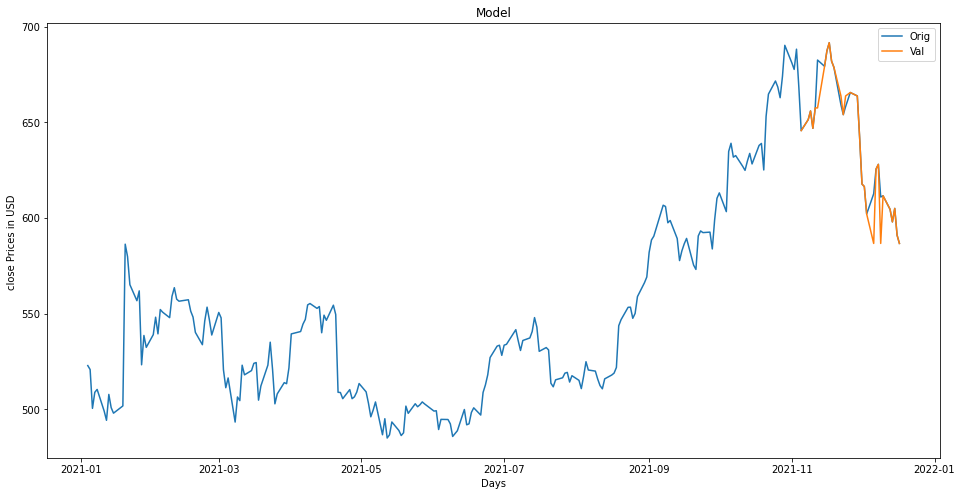

In [25]:
predictionss=tree_prediction

valid=stock[x.shape[0]:]
valid['predictionss']=predictionss
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('close Prices in USD ')
plt.xlabel('Days')
plt.plot(stock['Close'])
plt.plot(valid['predictionss'])
plt.legend(['Orig','Val','Pred'])

plt.show()